In [1]:
from tools import tsplot, tsdiag, cusumRepeat, simArima
from statsmodels.tsa.arima_model import ARIMA, ARMA
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
%matplotlib inline

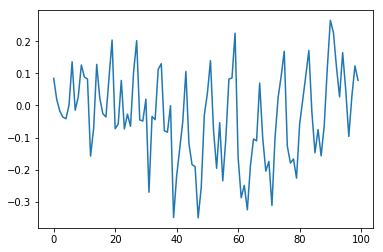

In [7]:
nSample = 100
ar = np.array([ +0.547, 0, 0, 0, 0, 0, 0, +0.86, -0.86*0.547]) # Auto Regresive parameters
ma = np.array([])    # Moving Average parameters
sigma = 0.065
arroots = np.polynomial.Polynomial(np.r_[1, ar]).roots()
maroots = np.polynomial.Polynomial(np.r_[1, ma]).roots()

dParam = 0          # Integrated parameter
sim1 = simArima(ar = ar, d = dParam, ma = ma, n = nSample, sigma = sigma)
plt.plot(sim1)

# My predictions

In [4]:
input_list = [6.153, 6.308, 6.327, 6.344, 6.266, 6.121, 6.096, 6.081, 6.178, 6.411, 6.442, 6.505, 6.195, 6.085, 6.086, 6.079]
inputs = np.array(input_list)
mu = 6.24
pred_1 = 0.547 * (inputs[-1-0] - mu) + 0.86 * (inputs[-1-7] - mu) + 0.547 * 0.86 *(inputs[-1-8] - mu) + mu
pred_2 = 0.547 * (pred_1 - mu) +       0.86 * (inputs[-1-6] - mu) + 0.547 * 0.86 *(inputs[-1-7] - mu) + mu


sigma1 =  0.065
sigma2 = (1+(1-0.547)**2) * sigma1

with_preds = np.array(input_list)
pred_1,pred_2,sigma2

(6.02381622, 6.239641432339999, 0.078338585)

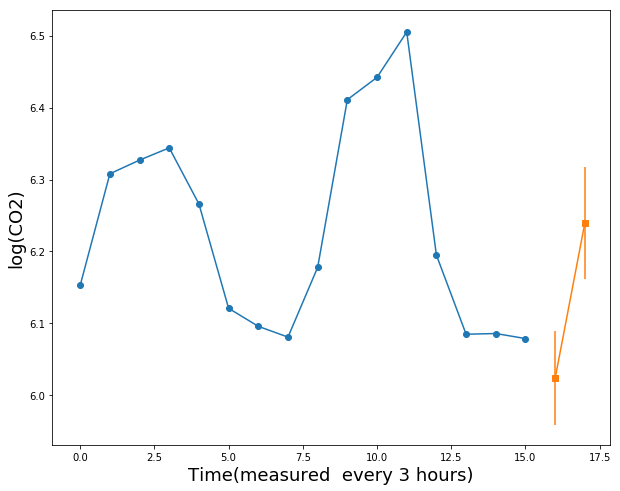

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(with_preds)
x = np.arange(len(with_preds))
plt.scatter(x, with_preds)
plt.errorbar([x[-1]+1, x[-1]+2], [pred_1, pred_2], [sigma1, sigma2], marker='s' )
plt.xlabel('Time(measured  every 3 hours)', fontsize = 18)
plt.ylabel('log(CO2)', fontsize = 18)
plt.savefig('report/Question_2-2.png')

# Predictions, std and  5-95th conf interval

In [49]:
model = ARIMA(sim1, order = (9,0,0)).fit(method='mle', trend='nc')
# model = ARIMA(sim1, order = (9,0,0))
model.params = np.array([ +0.547, 0, 0, 0, 0, 0, 0, +0.86, -0.86*0.547])
roots = np.polynomial.Polynomial(np.array([ 1, +0.547, 0, 0, 0, 0, 0, 0, +0.86, -0.86*0.547])).roots()
print('Coefficients: ' + str( model.params))
model.forecast(4)

Coefficients: [ 0.547    0.       0.       0.       0.       0.       0.       0.86
 -0.47042]


(array([-0.3160327 ,  0.86154806, -1.78903112, -0.09160662]),
 array([0.96476385, 1.07867976, 1.10773435, 1.10867995]),
 array([[-2.20693509,  1.57486969],
        [-1.25262542,  2.97572155],
        [-3.96015056,  0.38208832],
        [-2.26457939,  2.08136615]]))

In [46]:
roots

array([-0.85074774-0.30208384j, -0.85074774+0.30208384j,
       -0.46863147-0.84513517j, -0.46863147+0.84513517j,
        0.27409714-1.01224379j,  0.27409714+1.01224379j,
        1.03021046-0.55250802j,  1.03021046+0.55250802j,
        1.85829677+0.j        ])

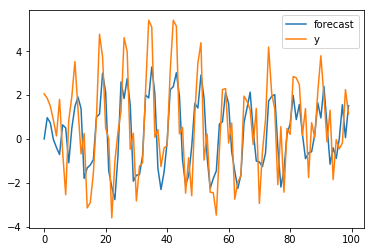

In [47]:
model.plot_predict();

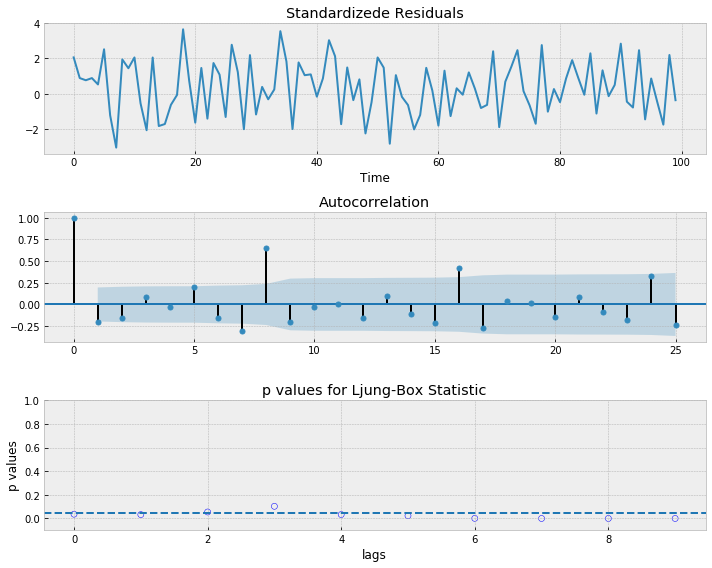

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(7, 0)   Log Likelihood                -187.772
Method:                           mle   S.D. of innovations              1.567
Date:                Tue, 02 Apr 2019   AIC                            391.543
Time:                        10:55:04   BIC                            412.384
Sample:                             0   HQIC                           399.978
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.3805      0.097      3.919      0.000       0.190       0.571
ar.L2.y        0.1676      0.103      1.621      0.108      -0.035       0.370
ar.L3.y       -0.2875      0.101     -2.834      0.006      -0.486      -0.089
ar.L4.y       -0.0168      0.106     -0.158      0.875      -0.225       0.191
ar.L5.y       -0.2046      0.101     -2.031      0.045      -0.402      -0.007
ar.L6.y        0.1632      0.104      1.565      0.121      -0.041       0.367
ar.L7.y        0.2322      0.098      2.365      0.020       0.040       0.425
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7379           -0.7557j            1.0563           -0.1269
AR.2            0.7379           +0.7557j            1.0563            0.1269
AR.3            1.2051           -0.0000j            1.2051           -0.0000
AR.4           -0.3059           -1.2308j            1.2682           -0.2888
AR.5           -0.3059           +1.2308j            1.2682            0.2888
AR.6           -1.3859           -0.2659j            1.4112           -0.4698
AR.7           -1.3859           +0.2659j            1.4112            0.4698
-----------------------------------------------------------------------------
"""

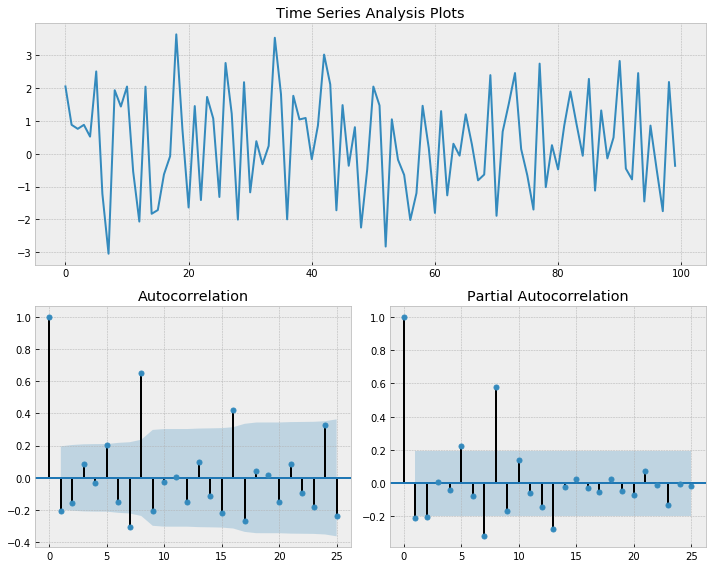

In [48]:
tsdiag(model.resid)
plt.savefig('report/Question_2-2_model_check.png')
plt.show()
tsplot(model.resid)

model.summary(alpha=0.05)
# plt.savefig('report/Question_2-2_model_check.png')